In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('gd_results.csv').drop(columns=['T', 'mu'])


df['neg_log_mi'] = df['inverse_mi_budget'].apply(lambda x: np.log2(x))
df = df.drop(columns=['inverse_mi_budget'])
# group by dataset_name, mu, use_e0, inverse_mi_budget, privacy_aware
grouped = df.groupby(['dataset_name', 'use_e0', 'neg_log_mi', 'privacy_aware'])
# get the mean final_train_loss and test_acc mean for each group
mean_df = grouped[['final_train_loss', 'test_acc']].mean().reset_index()
std_df = grouped[['final_train_loss', 'test_acc']].std().reset_index()

In [2]:
from matplotlib import pyplot as plt


def plot(dataset_name, use_e0, metric):
    plt.figure()
    for privacy_aware in [True, False]:
        subset = mean_df[(mean_df['dataset_name'] == dataset_name) & 
                         (mean_df['use_e0'] == use_e0) & 
                         (mean_df['privacy_aware'] == privacy_aware)]
        
        std_subset = std_df[(std_df['dataset_name'] == dataset_name) & 
                            (std_df['use_e0'] == use_e0) & 
                            (std_df['privacy_aware'] == privacy_aware)]
        
        label = 'Privacy-Aware' if privacy_aware else 'Privacy-Oblivious'
        
        plt.errorbar(subset['neg_log_mi'], subset[metric], 
                     yerr=std_subset[metric], label=label, capsize=5, marker='o')
    
    plt.xlabel('-log2(MI Budget)')
    dataset_to_label = {
        'bank': 'Bank Marketing',
        'mnist': 'MNIST',
        'mnist_0_vs_7': 'MNIST 0 vs 7',
        'mnist_7_vs_9': 'MNIST 7 vs 9'
    }
    metric_to_label = {
        'test_acc': 'Test Accuracy',
        'final_train_loss': 'Final Training Loss'
    }

    plt.ylabel(metric_to_label[metric])
    plt.title(f'{dataset_to_label[dataset_name]} (e0={use_e0})')
    plt.legend()
    plt.grid(True)
    plt.show()

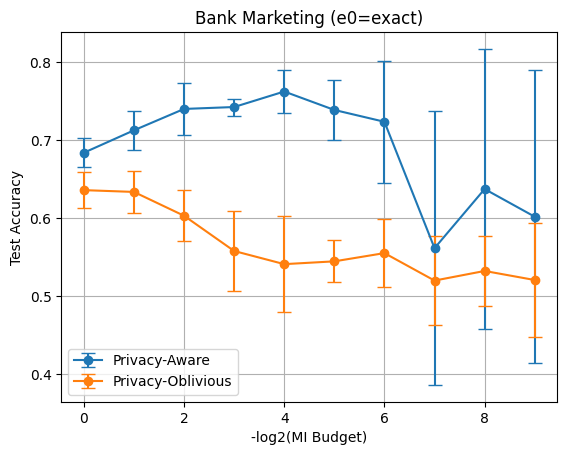

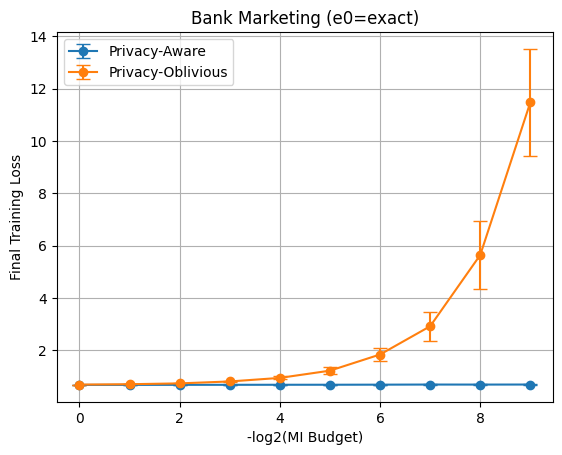

In [3]:
plot('bank', 'exact', 'test_acc')
plot('bank', 'exact', 'final_train_loss')

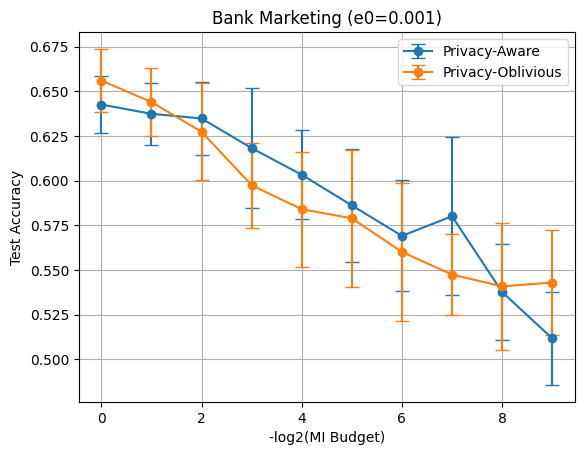

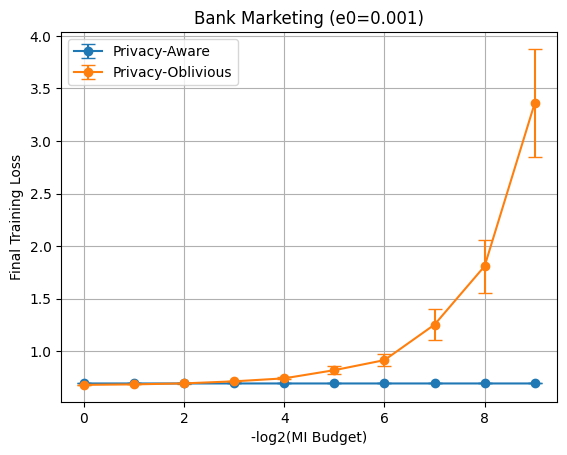

In [4]:
plot('bank', '0.001', 'test_acc')
plot('bank', '0.001', 'final_train_loss')

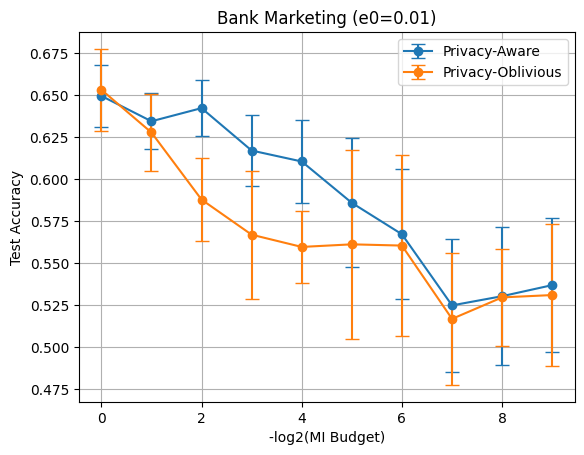

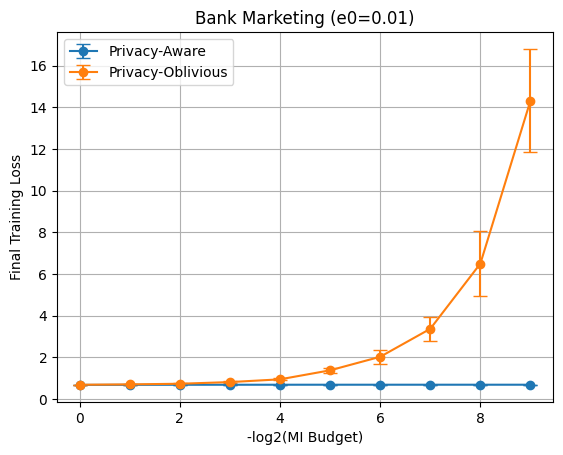

In [5]:
plot('bank', '0.01', 'test_acc')
plot('bank', '0.01', 'final_train_loss')

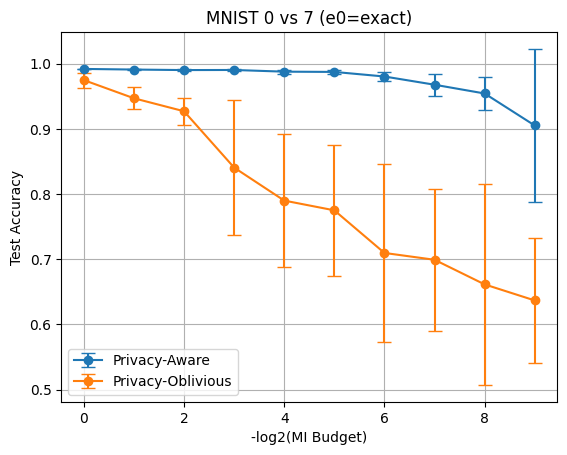

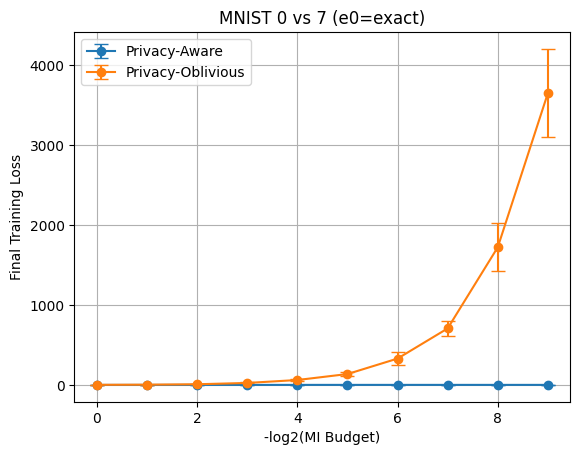

In [6]:
plot('mnist_0_vs_7', 'exact', 'test_acc')
plot('mnist_0_vs_7', 'exact', 'final_train_loss')

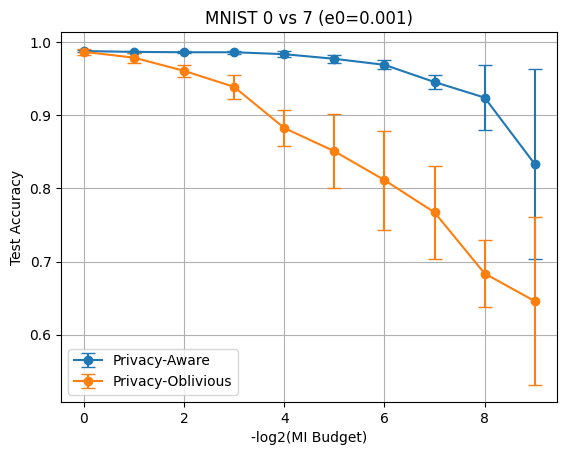

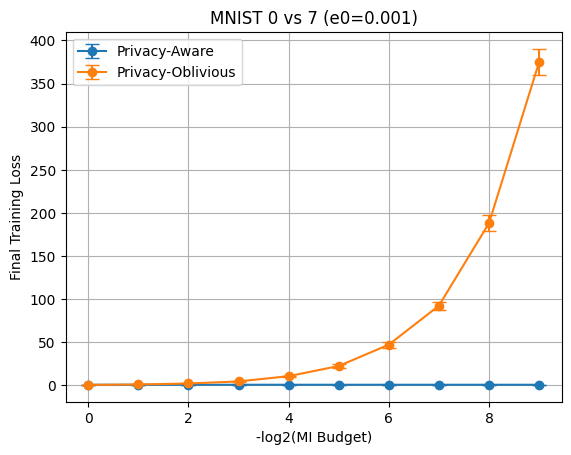

In [7]:
plot('mnist_0_vs_7', '0.001', 'test_acc')
plot('mnist_0_vs_7', '0.001', 'final_train_loss')

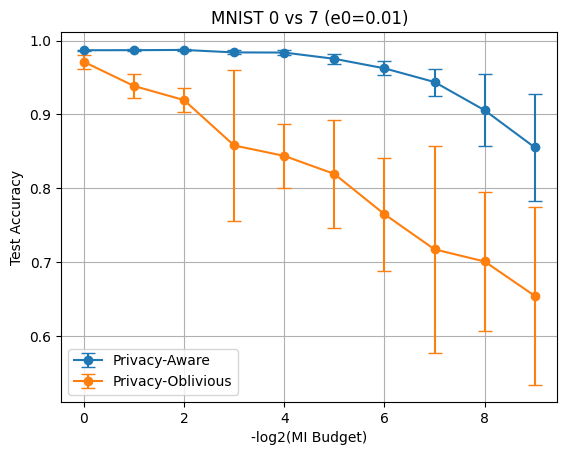

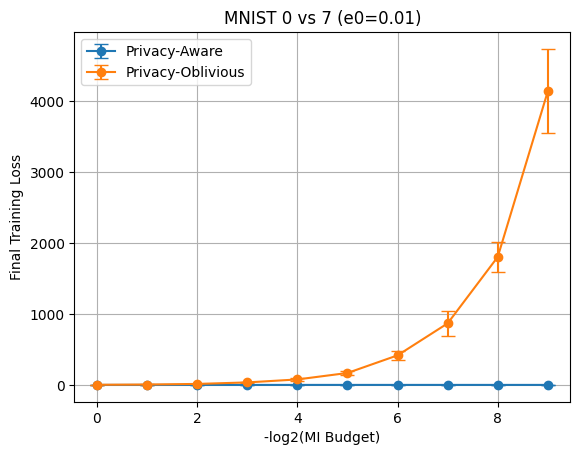

In [8]:
plot('mnist_0_vs_7', '0.01', 'test_acc')
plot('mnist_0_vs_7', '0.01', 'final_train_loss')

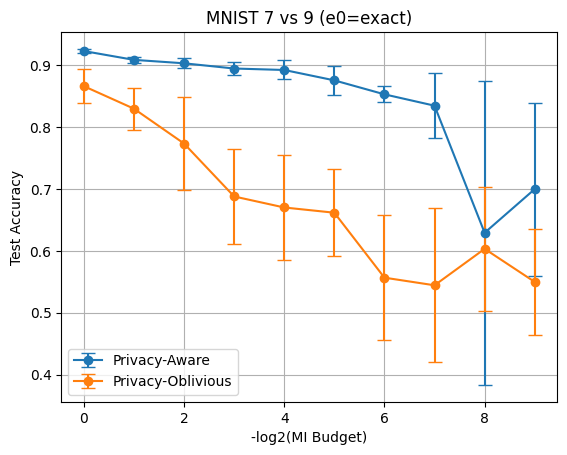

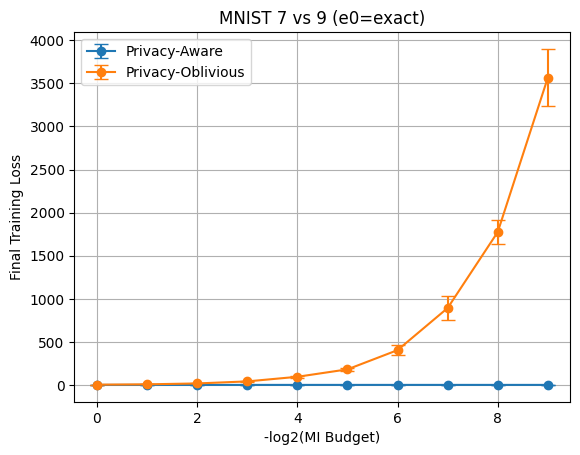

In [9]:
plot('mnist_7_vs_9', 'exact', 'test_acc')
plot('mnist_7_vs_9', 'exact', 'final_train_loss')

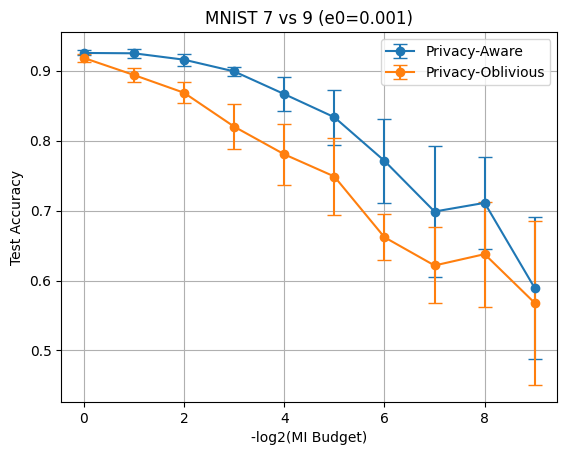

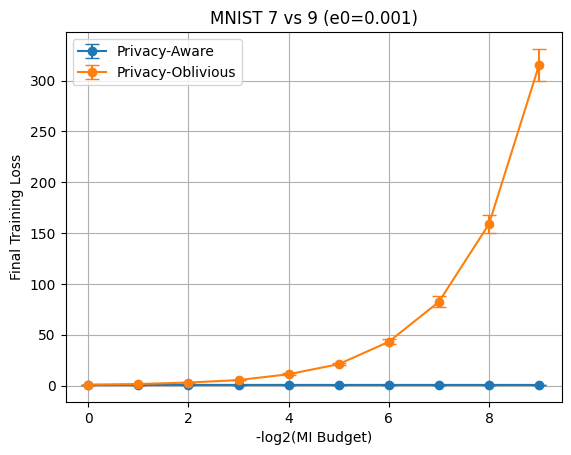

In [10]:
plot('mnist_7_vs_9', '0.001', 'test_acc')
plot('mnist_7_vs_9', '0.001', 'final_train_loss')

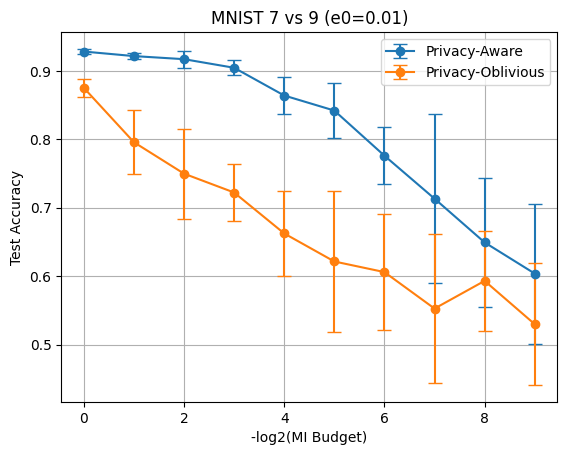

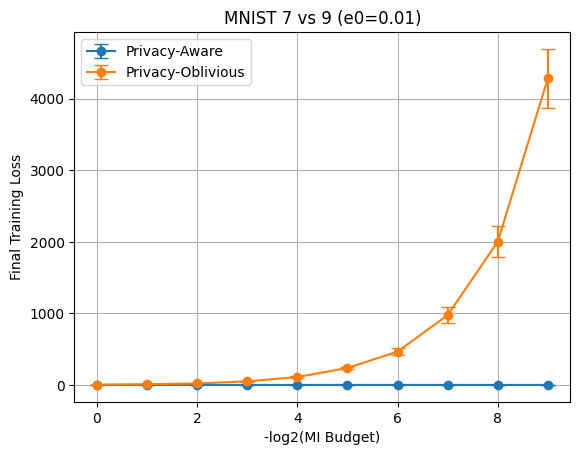

In [11]:
plot('mnist_7_vs_9', '0.01', 'test_acc')
plot('mnist_7_vs_9', '0.01', 'final_train_loss')

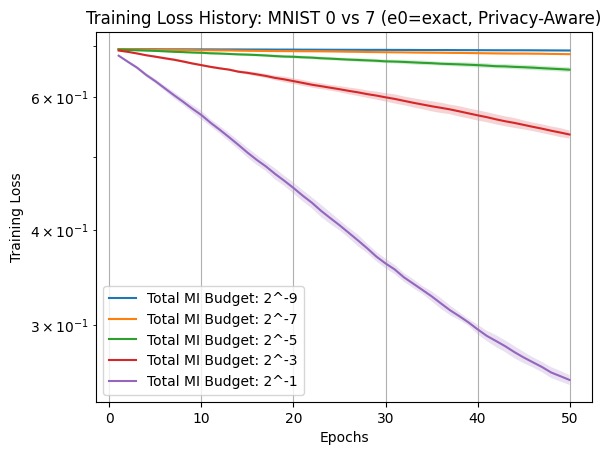

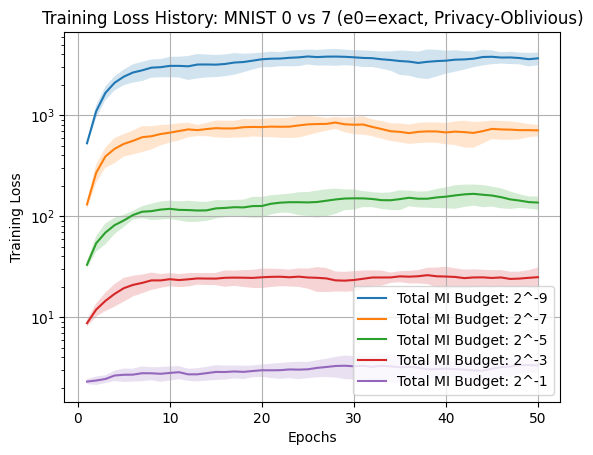

In [12]:
df_training_history = pd.read_csv('gd_results.csv').drop(columns=['T', 'mu', 'final_train_loss', 'test_acc'])
df_training_history['neg_log_mi'] = df_training_history['inverse_mi_budget'].apply(lambda x: np.log2(x))
df_training_history = df_training_history.drop(columns=['inverse_mi_budget'])

# train_loss_list is a column of lists but a string, make it a column of lists of floats
df_training_history['train_loss_list'] = df_training_history['train_loss_list'].apply(lambda x: [float(i) for i in x.strip('[]').split(',')])
# group by dataset_name, mu, use_e0, neg_log_mi, privacy_aware, and get the mean list and std list of train_loss_list
grouped_history = df_training_history.groupby(['dataset_name', 'use_e0', 'neg_log_mi', 'privacy_aware'])['train_loss_list'].apply(list).reset_index()
import numpy as np
def mean_std_lists(lists):
    arr = np.array([np.array(x) for x in lists])
    mean = np.mean(arr, axis=0)
    std = np.std(arr, axis=0)
    return mean, std
grouped_history['mean_train_loss'], grouped_history['std_train_loss'] = zip(*grouped_history['train_loss_list'].apply(mean_std_lists))

# plot for mnist_0_vs_7, exact, neg_log_mi=8, both curves for privacy_aware and privacy_oblivious with mean loss curve and std shading
def plot_training_history(dataset_name, use_e0, privacy_aware):
    plt.figure()
    for neg_log_mi in [9, 7, 5, 3, 1]:
        subset = grouped_history[(grouped_history['dataset_name'] == dataset_name) & 
                                (grouped_history['use_e0'] == use_e0) & 
                                (grouped_history['neg_log_mi'] == neg_log_mi) & 
                                (grouped_history['privacy_aware'] == privacy_aware)]
        
        label = f'Total MI Budget: 2^-{neg_log_mi}'
        
        mean_loss = subset['mean_train_loss'].values[0]
        std_loss = subset['std_train_loss'].values[0]
        epochs = range(1, len(mean_loss) + 1)
        
        plt.plot(epochs, mean_loss, label=label)
        plt.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, alpha=0.2)
    
    plt.yscale('log')
    plt.xlabel('Epochs')
    plt.ylabel('Training Loss')
    dataset_to_label = {
        'bank': 'Bank Marketing',
        'mnist': 'MNIST',
        'mnist_0_vs_7': 'MNIST 0 vs 7',
        'mnist_7_vs_9': 'MNIST 7 vs 9'
    }
    privacy_aware_str = 'Privacy-Aware' if privacy_aware else 'Privacy-Oblivious'
    plt.title(f'Training Loss History: {dataset_to_label[dataset_name]} (e0={use_e0}, {privacy_aware_str})')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history('mnist_0_vs_7', 'exact', True)
plot_training_history('mnist_0_vs_7', 'exact', False)